<a href="https://colab.research.google.com/github/M-Nassef/Regularization/blob/main/Lab09_1_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dogs vs. Cats Classification

Select free T4 GPU in Runtime settings

## Download data

In [1]:
!pip install -q gdown
!gdown https://drive.google.com/uc?id=12WhCCpKTWpeBztLegcoYx2gMo2KbaxDG

Downloading...
From (original): https://drive.google.com/uc?id=12WhCCpKTWpeBztLegcoYx2gMo2KbaxDG
From (redirected): https://drive.google.com/uc?id=12WhCCpKTWpeBztLegcoYx2gMo2KbaxDG&confirm=t&uuid=142ac620-b49e-4c8a-9035-027dfc706412
To: /content/dogs-vs-cats.zip
100% 852M/852M [00:10<00:00, 80.7MB/s]


In [11]:
import zipfile

with zipfile.ZipFile('dogs-vs-cats.zip', 'r') as zip_file:
    zip_file.extractall('data')

with zipfile.ZipFile('data/train.zip', 'r') as zip_file:
    zip_file.extractall('data/')

In [ ]:
## Prepare load

In [12]:
import os
import shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Paths
base_dir = 'data/train'
train_dir = 'data/train_split'
val_dir = 'data/val_split'

# Create directories
os.makedirs(os.path.join(train_dir, 'dogs'), exist_ok=True)
os.makedirs(os.path.join(train_dir, 'cats'), exist_ok=True)
os.makedirs(os.path.join(val_dir, 'dogs'), exist_ok=True)
os.makedirs(os.path.join(val_dir, 'cats'), exist_ok=True)

# Split data
filenames = os.listdir(base_dir)
train_files, val_files = train_test_split(filenames, test_size=0.2, random_state=42)

for file in train_files:
    if 'dog' in file:
        shutil.move(os.path.join(base_dir, file), os.path.join(train_dir, 'dogs', file))
    elif 'cat' in file:
        shutil.move(os.path.join(base_dir, file), os.path.join(train_dir, 'cats', file))

for file in val_files:
    if 'dog' in file:
        shutil.move(os.path.join(base_dir, file), os.path.join(val_dir, 'dogs', file))
    elif 'cat' in file:
        shutil.move(os.path.join(base_dir, file), os.path.join(val_dir, 'cats', file))

## Create data generators

In [13]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Load data from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


## Create basic CNN classification model

In [14]:
from tensorflow.keras import models, layers

# Build the model
model_basic = models.Sequential([
    layers.Input(shape=(150, 150, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_basic.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [15]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True,  # roll back to the best weights
    verbose=1
)

## Train basic model

In [16]:
history_model_basic = model_basic.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    callbacks=[early_stop]

)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 62ms/step - accuracy: 0.6216 - loss: 0.6508 - val_accuracy: 0.7526 - val_loss: 0.5085
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 68ms/step - accuracy: 0.7803 - loss: 0.4666 - val_accuracy: 0.7900 - val_loss: 0.4577
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 61ms/step - accuracy: 0.8302 - loss: 0.3777 - val_accuracy: 0.8308 - val_loss: 0.3794
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 62ms/step - accuracy: 0.8690 - loss: 0.3054 - val_accuracy: 0.8220 - val_loss: 0.3970
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 61ms/step - accuracy: 0.9102 - loss: 0.2175 - val_accuracy: 0.8348 - val_loss: 0.4067
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 62ms/step - accuracy: 0.9491 - loss: 0.1323 - val_accuracy: 0.8318 - val_loss: 0.5342
Epoch 6: early stopping
Restoring model weights from the end of the best epoch: 3.


## Plot accuracy and loss

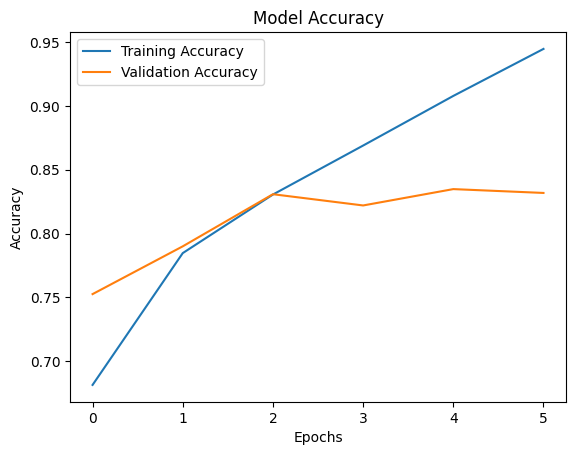

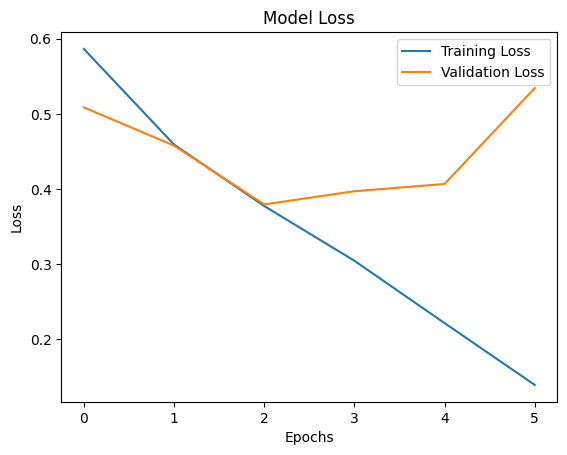

In [17]:
plt.plot(history_model_basic.history['accuracy'], label='Training Accuracy')
plt.plot(history_model_basic.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history_model_basic.history['loss'], label='Training Loss')
plt.plot(history_model_basic.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Tasks

## Add regularization

- Copy the model from above and rename
- Add different regularization methods as described in the lab instructions and evaluate results.




In [18]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# No shuffle
val_generator_noshuffle = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# Predict probabilities
pred_probs = model_basic.predict(val_generator_noshuffle)

# Convert probabilities to binary predictions
y_pred = (pred_probs > 0.5).astype(int).flatten()

# True labels
y_true = val_generator_noshuffle.classes

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)


Found 5000 images belonging to 2 classes.
157/157 ━━━━━━━━━━━━━━━━━━━━ 12s 68ms/step
Confusion Matrix:
 [[2073  406]
 [ 440 2081]]


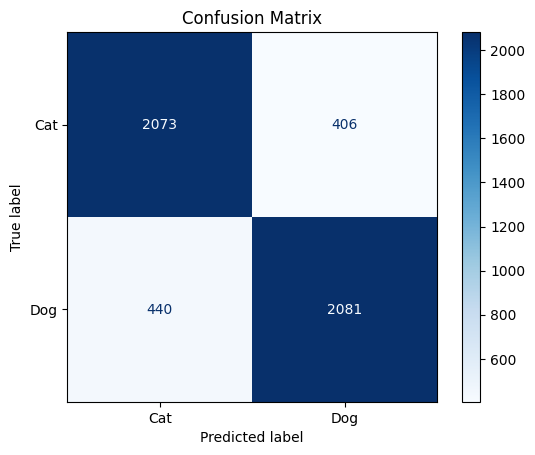

In [19]:
# Plot Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Cat','Dog'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

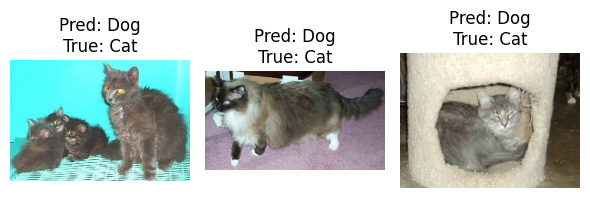

In [20]:
# Get filenames of validation images
filenames = val_generator_noshuffle.filenames

# Indices of misclassified images
misclassified_idx = np.where(y_pred != y_true)[0]

# How many to display
n_to_show = 3
plt.figure(figsize=(6, 6))

for i, idx in enumerate(misclassified_idx[:n_to_show]):
    img_path = filenames[idx]

    # Load image (unscaled) to display nicely
    img = plt.imread(os.path.join(val_dir, img_path))

    # Plot
    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.axis('off')

    # Predicted label (0 or 1) to string
    pred_label = 'Dog' if y_pred[idx] == 1 else 'Cat'
    true_label = 'Dog' if y_true[idx] == 1 else 'Cat'

    plt.title(f"Pred: {pred_label}\nTrue: {true_label}")

plt.tight_layout()
plt.show()
